# Chapter 4. Feature engineering and Represeting data.
# Part 3. Polynomials and interactions.
These are methods used to extend feature space.

## - Interactions (in pair with Binning)
Interactions are a products of features. Used with binning it allows linear models to be much more flexible since the product of bin feature and original feature gives an individual angle for bin.

Preparations (gain from previous Part 2):

In [10]:
from sklearn.linear_model import LinearRegression
import mglearn
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
bins = np.linspace(-3,3, 11)
which_bin = np.digitize(X, bins=bins)
encoder = OneHotEncoder(sparse=False).fit(which_bin)
X_binned = encoder.transform(which_bin)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = encoder.transform(np.digitize(line, bins=bins))

Applying interactions:

In [2]:
#merging bin data with product of bins and original features
X_product = np.hstack([X_binned, X*X_binned])
print(X_binned.shape)
print((X*X_binned).shape)
print('Gain dataset size: {}'.format(X_product.shape))

(100, 10)
(100, 10)
Gain dataset size: (100, 20)


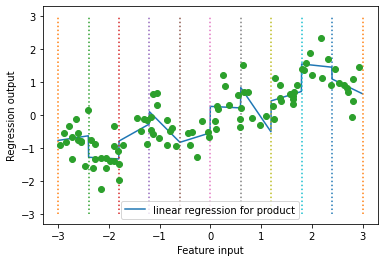

In [11]:
reg = LinearRegression().fit(X_product,y)

#'np.hstack' is concatenation
line_product = np.hstack([line_binned, line*line_binned])

plt.plot(line, reg.predict(line_product), label='linear regression for product')
for bin in bins:
    plt.plot([bin,bin], [-3,3], ':')
plt.plot(X[:,0], y, 'o')
plt.ylabel('Regression output')
plt.xlabel('Feature input')
plt.legend(loc='best')

## Polynomials
Extending feature space by powers of original features

Creating polynomial features:

In [25]:
from sklearn.preprocessing import PolynomialFeatures

#initializing, building and applying polynom generator
poly = PolynomialFeatures(degree=10, include_bias=False).fit(X)
X_poly = poly.transform(X)

X_poly.shape

(100, 10)

Applying polynomial features:

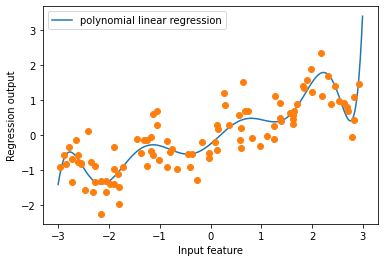

In [31]:
#initializing and building model
reg = LinearRegression().fit(X_poly, y)

#samples polynomial feature preparation
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:,0], y, 'o')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

^ Notice line high angles at tips which is a characteristic feature of polynomial regressions.
That's why sometimes it's better to use SVR